# Investigating the No-Appointments Dataset

### Table of contents:
#### 1. Introduction
#### 2. Data Wrangling 
#### 3. Exploratory Data Analysis
#### 4. Conclusions 

### 1.Introduction 
#### Dataset Description:
This is a dataset of 100k medical appointments in Brazil that we will investigate throughly to find the relations and factors with which we can tell the percentage of if the patient will show up for his medical appointment or not.
#### Question(s) for analysis:
1. What is average of people who miss their medical appointments and do not show up?
2. Who do not show for their medical appointments more? males or females?
3. What is the average age of people who do not show for their medical appointments?
4. How much does women and men stick to their appointments in different stages of their life?
5. Are people with diabetes more likely to miss their medicals appoitments than people with hypertension?
6. Are handicapped people more likely to miss their medical appointments than regular people?
7. Do people, who miss their appointments, likely send a message before that?

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

### 2. Data Wrangling 
    

In [2]:
#First, we will import our data and get familiarized with it to know what we need to do to answer the wanted questions
def data_uploud(path):
    df = pd.read_csv(path)
    return df
df=data_uploud('noshowappointments-kagglev2-may-2016.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


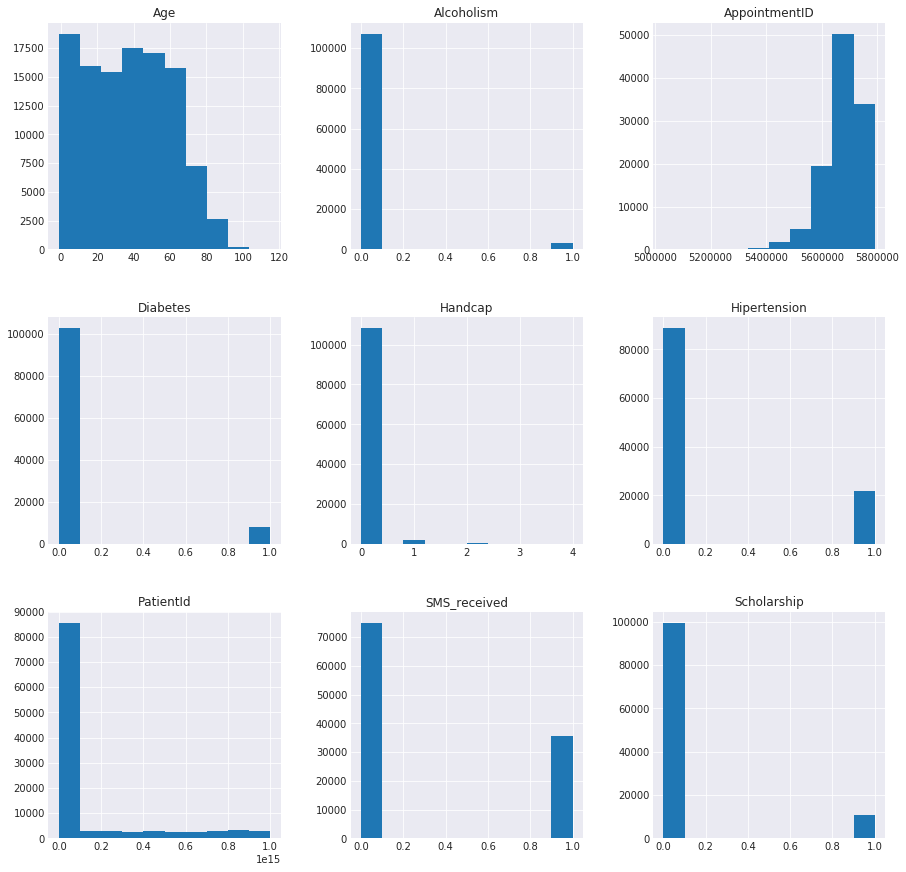

In [6]:
df.hist(figsize=(15,15));

In [7]:
sum(df.duplicated())

0

In [8]:
#Here, we will drop the columns that we will not need
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'],axis=1,inplace=True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


In [9]:
# Rename the columns to be more consistent 
df.rename(columns={'Gender':'gender','Age':'age','Scholarship':'scholarship','Hipertension':'hypertension','Diabetes':'diabetes','Alcoholism':'alcoholism','Handcap':'handicap','SMS_received':'sms_received','No-show':'no_show'},inplace=True)
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


In [10]:
#Rename some values to be more descriptive and consistent 
df.no_show[df['no_show']=='Yes']="didn't"
df.no_show[df['no_show']=='No']='did'
df.gender[df['gender']=='M']='male'
df.gender[df['gender']=='F']='female'
df.sms_received[df['sms_received']==1]='received'
df.sms_received[df['sms_received']==0]="didn't receive"
df.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ip

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,female,62,0,1,0,0,0,didn't receive,did
1,male,56,0,0,0,0,0,didn't receive,did
2,female,62,0,0,0,0,0,didn't receive,did
3,female,8,0,0,0,0,0,didn't receive,did
4,female,56,0,1,1,0,0,didn't receive,did
5,female,76,0,1,0,0,0,didn't receive,did
6,female,23,0,0,0,0,0,didn't receive,didn't
7,female,39,0,0,0,0,0,didn't receive,didn't
8,female,21,0,0,0,0,0,didn't receive,did
9,female,19,0,0,0,0,0,didn't receive,did


### 3. Exploratory Data Analysis

Q1: What is average of people who miss their medical appointments and do not show up?

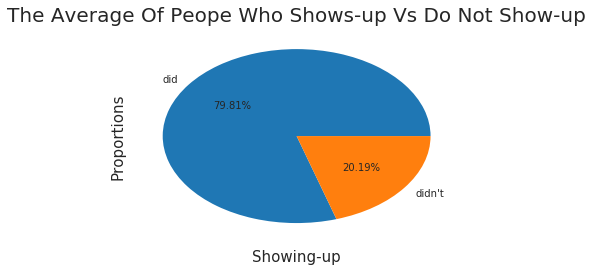

In [11]:
#We will use a poe chart to visualize the average of people who didn't show-up
df['no_show'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("The Average Of Peope Who Shows-up Vs Do Not Show-up",fontsize=20)
plt.xlabel('Showing-up',fontsize=15)
plt.ylabel('Proportions',fontsize=15);

From the previous pie chart we find that about 80 percentage of the people who schedule an appointment actually show-up for their appointment.

Q2: Who do not show for their medical appointments more? males or females?

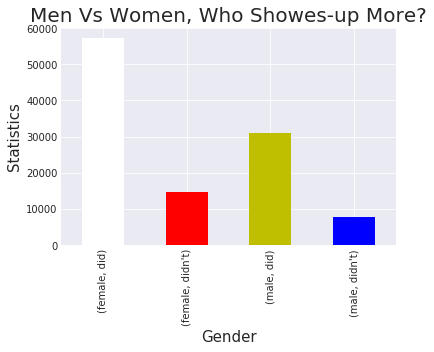

In [12]:
gender_counts=df.groupby(['gender','no_show'])['no_show'].count()
gender_counts.plot(kind='bar',color=['w','r','y','b']);
plt.title('Men Vs Women, Who Showes-up More?',fontsize=20)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Statistics',fontsize=15);

In [13]:
f_counts=df[df['gender']=='female']
m_counts=df[df['gender']=='male']
f_prop=f_counts[f_counts['no_show']=="didn't"]['no_show'].count()/f_counts['no_show'].count()
m_prop=m_counts[m_counts['no_show']=="didn't"]['no_show'].count()/m_counts['no_show'].count()
f_prop

0.20314587973273943

In [14]:
m_prop

0.19967947889471915

From the previous visualization and calculations, we can say that compared to men, more females do not show-up for their appointments.
But, after the calculations, we can find that the number of females who do not show-up with respect to the whole number of females is almost the same as the number of males who do not show-up with respect to the whole number of males.

Q3: What is the average age of people who do not show for their medical appointments?

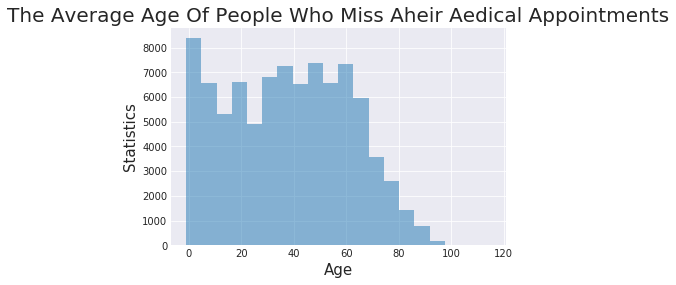

In [15]:
did=df.no_show=='did'
didnot=df.no_show=="didn't"
df.age[did].hist(alpha=.5,bins=20,label='Showed');
plt.title('The Average Age Of People Who Miss Aheir Aedical Appointments',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Statistics',fontsize=15);

From the previous representation, we notice that most of the people who miss their appointments are adults, between 30-60s.

Q4: How much does women and men stick to their appointments in different stages of their life?

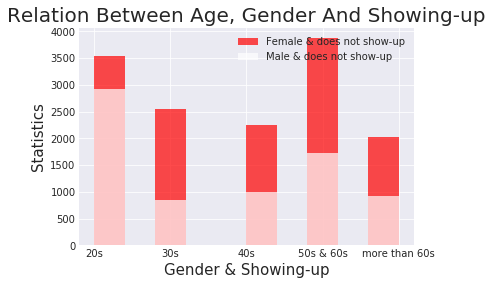

In [16]:
f_didnot=df[(df['no_show']=="didn't") & (df['gender']=='female')]
m_didnot=df[(df['no_show']=="didn't") & (df['gender']=='male')]
bin_edges=[0,20,30,40,60,90]
bin_labels=['20s','30s','40s','50s & 60s','more than 60s']
fage_graph=pd.cut(f_didnot['age'],bins=bin_edges,labels=bin_labels)
mage_graph=pd.cut(m_didnot['age'],bins=bin_edges,labels=bin_labels)
fage_graph.hist(alpha=.7,color='r')
mage_graph.hist(alpha=.7,color='w')
plt.title('Relation Between Age, Gender And Showing-up',fontsize=20)
plt.xlabel('Gender & Showing-up',fontsize=15)
plt.ylabel('Statistics',fontsize=15)
plt.legend(["Female & does not show-up", "Male & does not show-up"]);

In this graph, we find that females mostly miss their appoitments at their 50s & 60s, while males miss more in their 30s. 
However, we notice that in almost all intervals, compared to males, females are the most who do not show-up.

Q5: Are people with diabetes more likely to miss their medicals appoitments than people with hypertension?

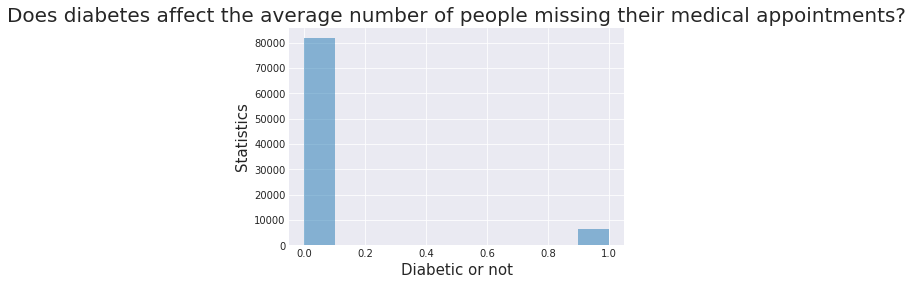

In [17]:
df.diabetes[did].hist(alpha=.5,label='Diabetic');
plt.title('Does diabetes affect the average number of people missing their medical appointments?',fontsize=20)
plt.xlabel('Diabetic or not',fontsize=15)
plt.ylabel('Statistics',fontsize=15);

From this graph we notice that there is a very small relation between showing-up and being diabetic or not, less than one-tenth. 

Q6: Are handicapped people more likely to miss their medical appointments than regular people?

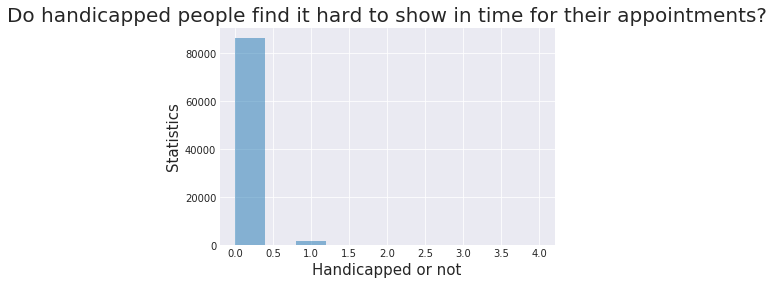

In [18]:
df.handicap[did].hist(alpha=.5,label='Handicapped');
plt.title('Do handicapped people find it hard to show in time for their appointments?',fontsize=20)
plt.xlabel('Handicapped or not',fontsize=15)
plt.ylabel('Statistics',fontsize=15);

From this graph we notice that there is almost no relation between showing-up and being handicapped or not.

Q7: Do people, who miss their appointments, likely send a message before that?

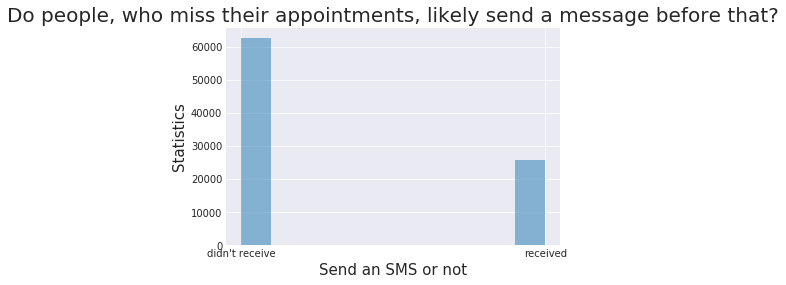

In [19]:
df.sms_received[did].hist(alpha=.5,label='SMS Received');
plt.title('Do people, who miss their appointments, likely send a message before that?',fontsize=20)
plt.xlabel('Send an SMS or not',fontsize=15)
plt.ylabel('Statistics',fontsize=15);

We notice from the graph that people who send an SMS informing that they will not come are almost one-third to people who do not send as SMS.

### 4. Conclusions
Previously, we went through analyzing a dataset about medical appointments in Brazil, did some data wrangling, then answered some importants questions related to it.
In the previous section, we answered some questions about the dataset and took some answers that will be summarized below:
1. We viualised the average of people who miss their medical appointments and do not show up.
2. Males or females, Who do not show for their medical appointments more.
3. We viualized the relation between age and missing medical appointments.
4. We analyzed whether it is dependent on being diabetic or not.
5. We also analyzed whether it is dependent on being handicapped or not.
6. On average, Whether people send a message before not showing to their appointment or not.


#### Limitations
After investigating and getting familiar with the dataset, we had to do the following:
1. Rename the columns as to be more consistent and easier to deal with.
2. Change the values of some columns to be more descriptibe and easier to deal with.

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'No-Show Appointments Project.ipynb'])

0